In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
#carregando os dados
arq = "jplus_stars_magnitudes_gaia_edr3.csv"
smag = pd.read_csv(arq)

x0 = smag.gSDSS-smag.rSDSS
y0 = smag.rSDSS-smag.iSDSS

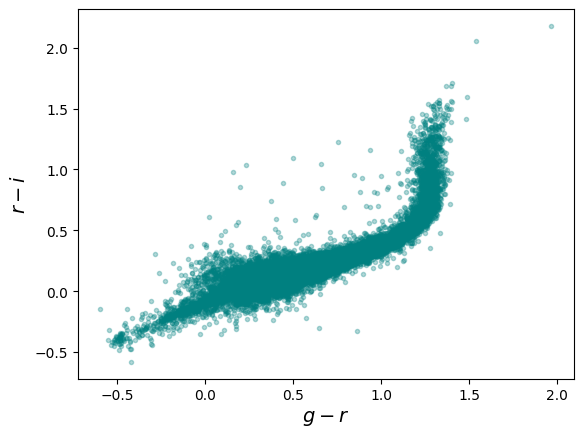

In [3]:
#visualizando os dados
plt.plot(x0, y0, ".", color='teal', alpha=.3)
plt.xlabel("$g-r$", fontsize=14)
plt.ylabel("$r-i$", fontsize=14)
plt.show()

In [4]:
#modelo a ser testado
def f(x, b0, b1, b2, b3, b4, b5):
  '''Função modelo de um polinômio do 5° grau.
  Entradas: Array, num, num, num, num, num, num
  Saída:    Array'''
  return b5*x**5 + b4*x**4 + b3*x**3 + b2*x**2 + b1*x + b0

In [5]:
#fazendo o ajuste da função
par, cov = curve_fit(f, x0, y0, p0=[0,0,0,0,0,0])
print(f"Parâmetros: {par}")

residuo = y0 - f(x0, *par) #residuo dos dados com a função ajustada
x_mod = np.arange(-1, 2, .1) #valores de x simulados para visualizar a função

Parâmetros: [-0.06009647  0.55336682 -0.25994056 -0.19342293  0.33702958  0.02825561]


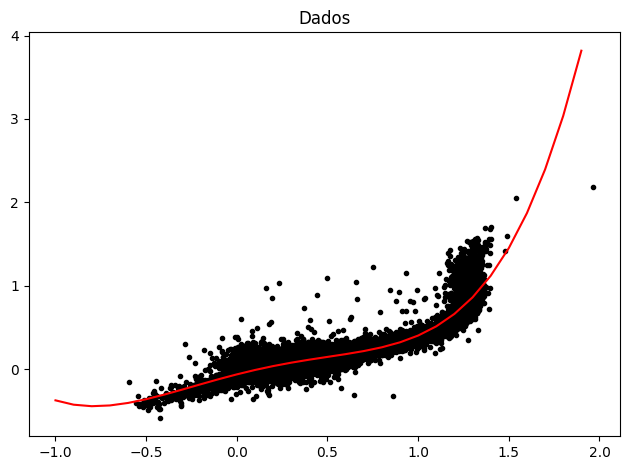

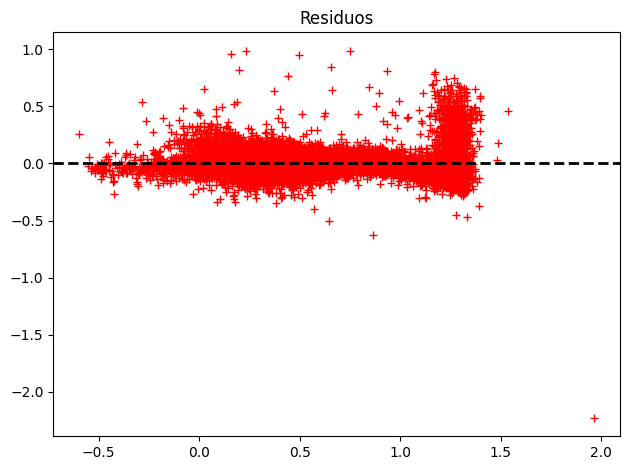

In [6]:
plt.title('Dados')
plt.plot(x0, y0, 'k.')
plt.plot(x_mod, f(x_mod, *par), 'r-')
plt.tight_layout()
plt.show()

plt.title('Residuos')
plt.plot(x0, residuo, 'r+')
plt.axhline(0, color='k', ls='--', lw=2)
plt.tight_layout()
plt.show()

In [7]:
#cálculo de desvio padrão e média
res_std = residuo.std()
print(f"{res_std  = }")
res_mean = residuo.mean()
print(f"{res_mean = }") #dado que a média é muito pequena, podemos considerar seu valor 0

res_std  = 0.04608560720522067
res_mean = 3.555307090961856e-10


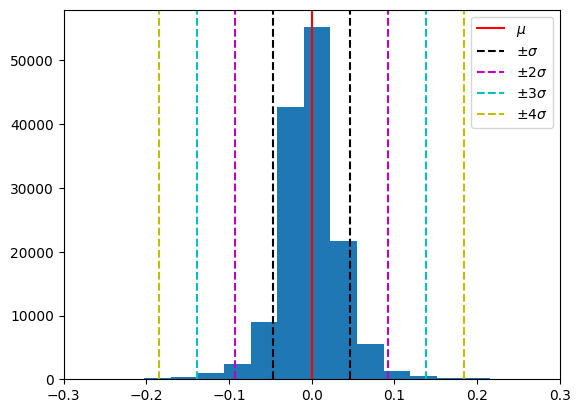

In [8]:
#visualização dos resíduos
plt.hist(residuo, 100)
plt.axvline(0, c='r', label='$\mu$')
plt.axvline(res_std, c='k', ls='--', label='$\pm\sigma$')     #68.27%
plt.axvline(-res_std, c='k', ls='--')
plt.axvline(2*res_std, c='m', ls='--', label='$\pm2\sigma$')  #95.45%
plt.axvline(-2*res_std, c='m', ls='--')
plt.axvline(3*res_std, c='c', ls='--', label='$\pm3\sigma$')  #99.73%
plt.axvline(-3*res_std, c='c', ls='--')
plt.axvline(4*res_std, c='y', ls='--', label='$\pm4\sigma$')  #99.99%
plt.axvline(-4*res_std, c='y', ls='--')
plt.xlim(-0.3, 0.3) #visualizando apenas a região central
plt.legend()
plt.show()

In [9]:
#selecionamos valores cujo resíduo está no intervalo de 4sigma, pois os dados
#não são uma distribuição gaussiana e não é esperado uma grande quantidade
#de outliers para esse ajuste
mask = (abs(residuo) < 4*res_std)
x = x0[mask]
y = y0[mask]

In [10]:
#refazendo o ajuste e recalculando o residuo
par, cov = curve_fit(f, x, y, p0=[0,0,0,0,0,0])
print(f"Parâmetros: {par}")

residuo = y - f(x, *par)

Parâmetros: [-0.04336557  0.42940539 -0.23258628  0.69544349 -1.07562885  0.6023646 ]


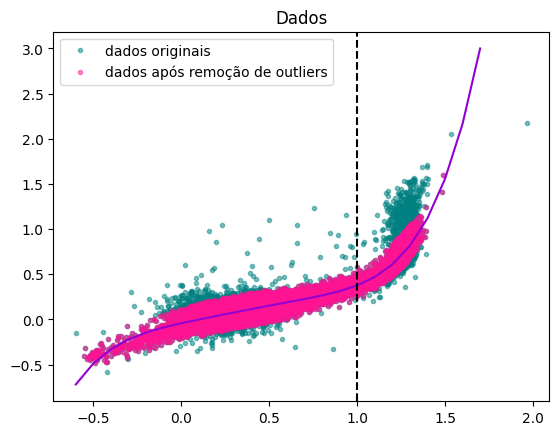

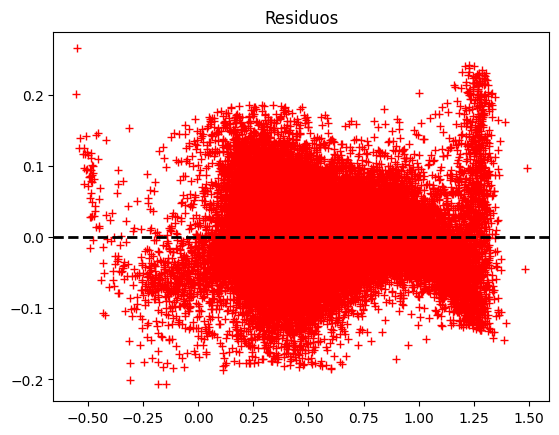

In [11]:
#visualizando o novo ajuste
plt.title('Dados')
plt.plot(x0, y0, '.', color='teal', alpha=.5, label='dados originais')
plt.plot(x, y, '.', color='deeppink', alpha=.5, label='dados após remoção de outliers')
plt.plot(x_mod[(x_mod > -.7)*(x_mod < 1.7)], f(x_mod[(x_mod > -.7)*(x_mod < 1.7)], *par), '-', color='darkviolet')
plt.axvline(1, color='k', ls='--')
plt.legend()
plt.show()

plt.title('Residuos')
plt.plot(x, residuo, 'r+')
plt.axhline(0, color='k', ls='--', lw=2)
plt.show()

In [12]:
#quantidade de pontos eliminados acima de 1 e menores que 1.6
#visualmente não são outliers mas não se ajustam ao modelo
x0[(x0>1)*(x0<1.6)].size - x[(x>1)*(x<1.6)].size

576

In [ ]:
#temos que o modelo ajustado representa bem os dados até aproximadamente 1,
#mas que para valores mais altos ele não se ajusta adequadamente aos dados.